In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import missingno as msno
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [96]:
df = pd.read_csv('data/netflix_titles.csv')

In [97]:
print(df.shape)
print(df.info())
df.head()

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [98]:
'''
show_id
type: 영화, TV show
title
director
cast
country: 제작된 국가
date_added: netfilx에 추가된 날짜
release_year: 실제 출시 연도
rating 
duration: 기간(분, 시즌)
listed_in: 장르
description: 요약 설명
'''

'\nshow_id\ntype: 영화, TV show\ntitle\ndirector\ncast\ncountry: 제작된 국가\ndate_added: netfilx에 추가된 날짜\nrelease_year: 실제 출시 연도\nrating \nduration: 기간(분, 시즌)\nlisted_in: 장르\ndescription: 요약 설명\n'

In [99]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [100]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

결측치 시각화, 처리

<Axes: >

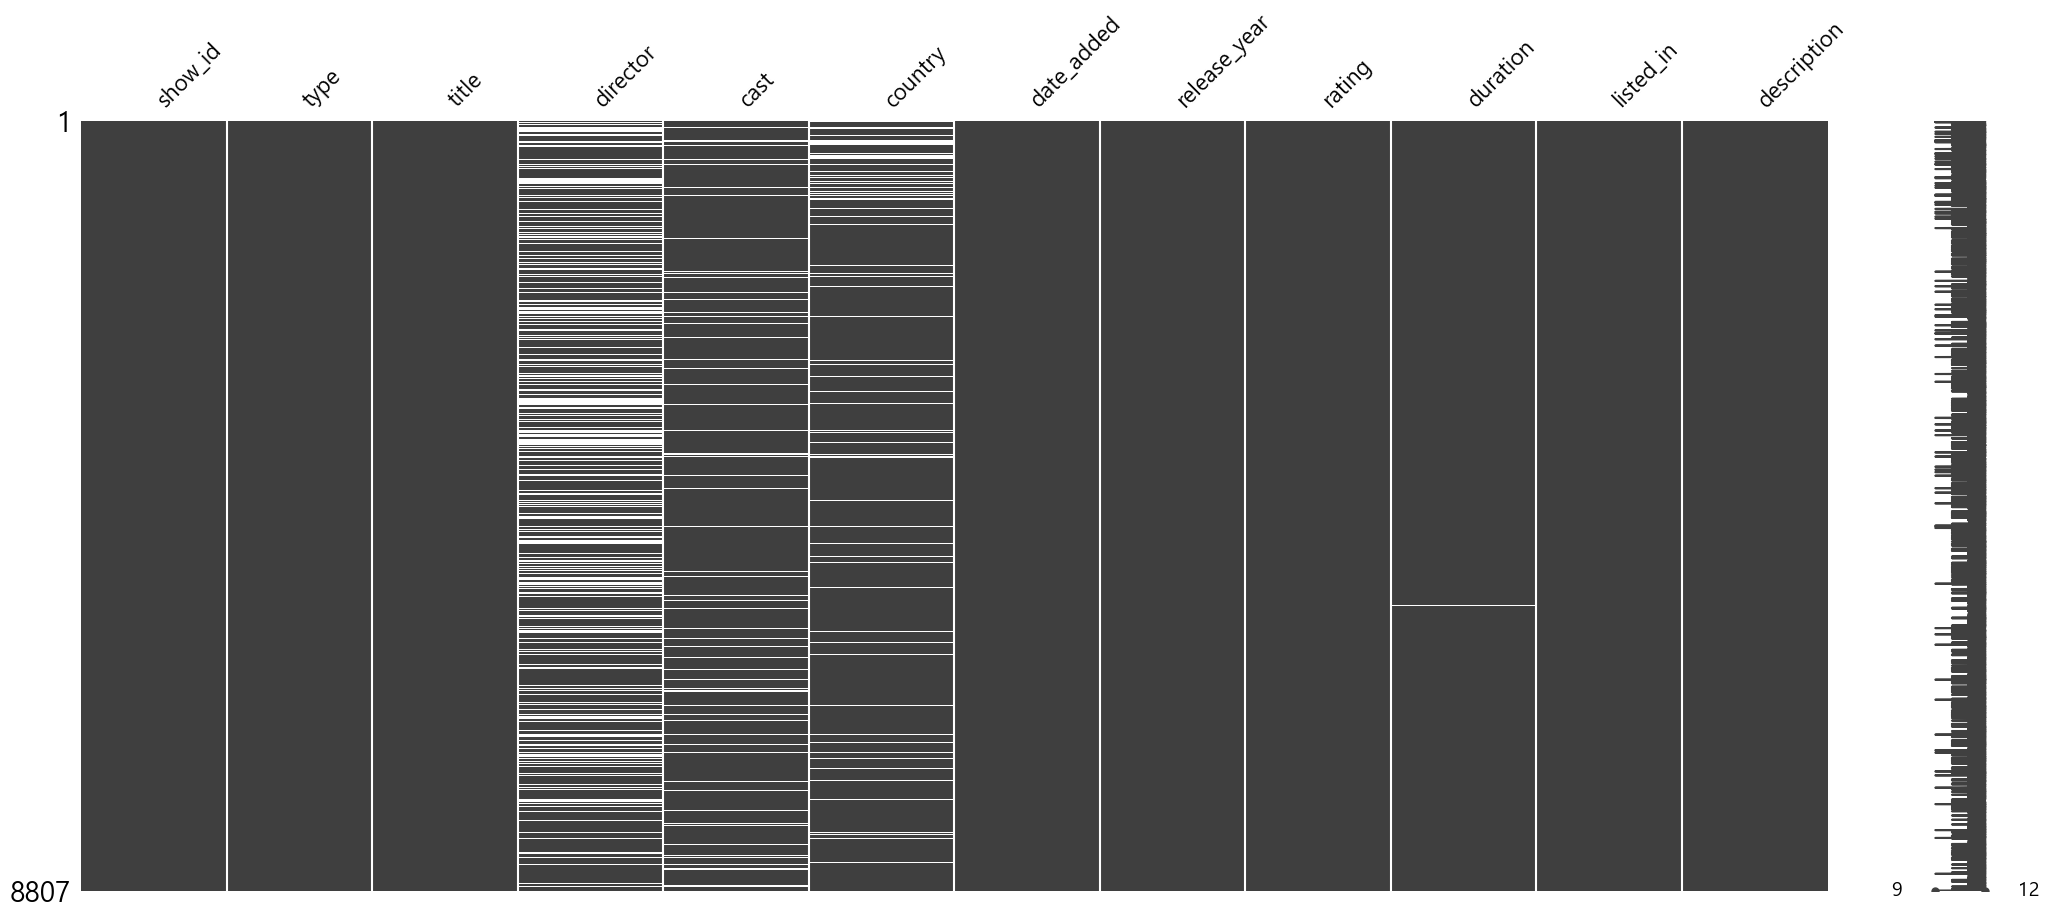

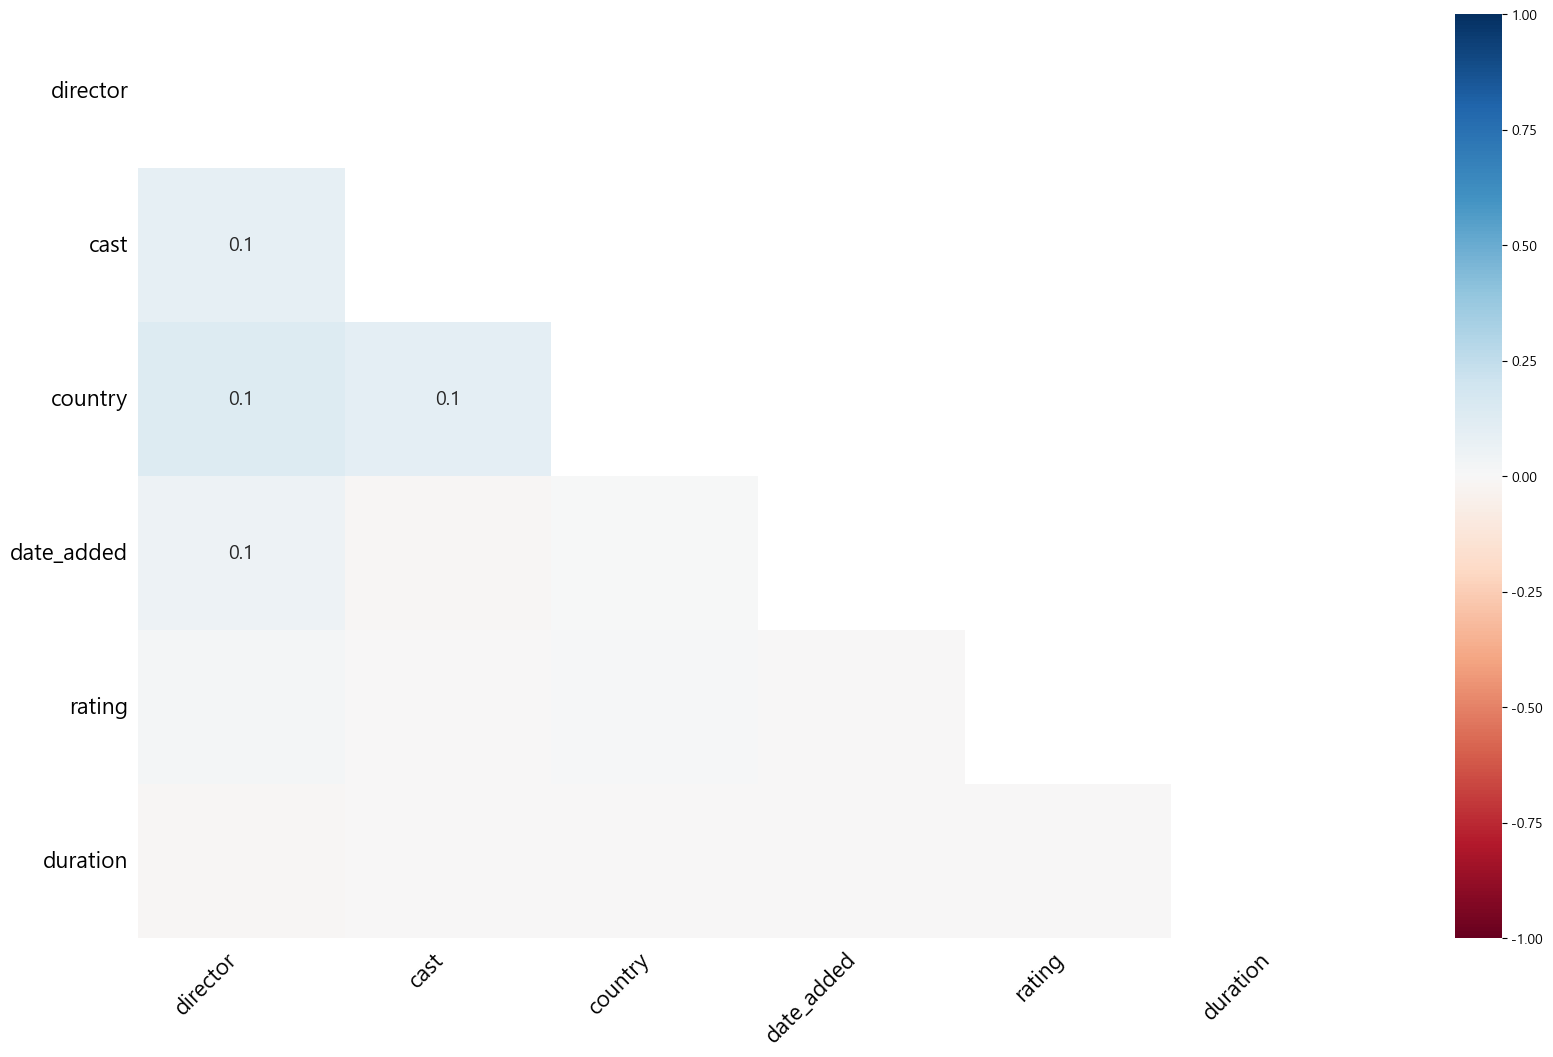

In [101]:
msno.matrix(df)
msno.heatmap(df)

In [102]:
# 넷플릭스 영상에 대한 데이터기 때문에, 감독정도는 결측치를 unknown으로 설정해도 괜찮을 것 같지만, 나머지는 그럴수 없다고 판단
# 결측치들 사이의 상관관계가 거의 없기 때문에 director을 제외한 결측치 삭제 조치
df = df.dropna(subset=['cast', 'country', 'rating', 'duration', 'date_added'])
df.isnull().sum()

show_id            0
type               0
title              0
director        1958
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [103]:
df['director'] = df['director'].fillna('Unknown')
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Groupby, Pivot_table, apply, lambda

In [104]:
profile = ProfileReport(df, title='netflix_titles Profileing report', explorative=True)
profile.to_file("day10_report.html")

In [105]:
df.groupby('country')['title'].count().sort_values(ascending=False)

country
United States                                    2479
India                                             940
United Kingdom                                    350
Japan                                             238
South Korea                                       196
                                                 ... 
Uruguay, Guatemala                                  1
Uruguay, Spain, Mexico                              1
Venezuela                                           1
Czech Republic, United Kingdom, United States       1
Australia, France                                   1
Name: title, Length: 689, dtype: int64

In [106]:
df_work= df.copy()
df_work['release_year_range'] = df_work['release_year'].apply(lambda x: int(x) // 10 * 10)

In [107]:
df_work.groupby('release_year_range')['type'].count()

release_year_range
1940       5
1950      11
1960      24
1970      68
1980     120
1990     257
2000     771
2010    4955
2020    1079
Name: type, dtype: int64

<Axes: xlabel='release_year_range'>

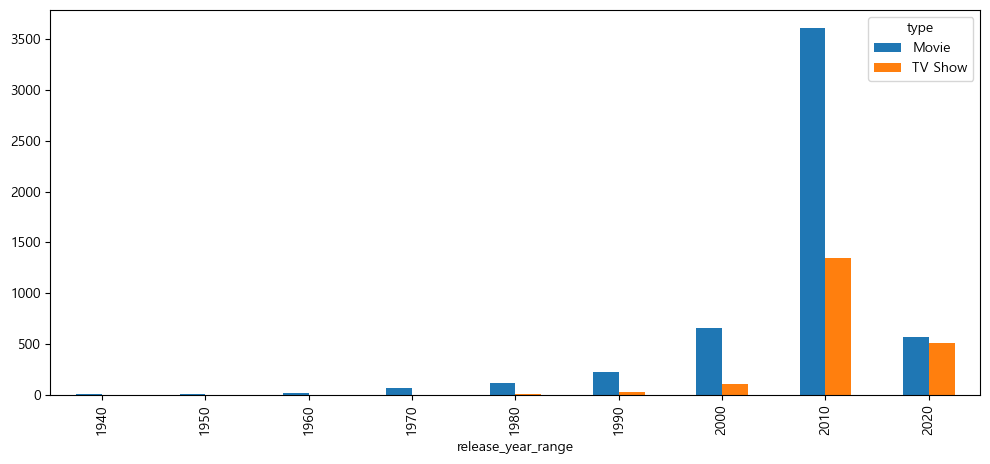

In [108]:
pivot = df_work.pivot_table(index='release_year_range', columns='type', values='title', aggfunc='count')
pivot.plot(kind='bar', figsize=(12, 5))

In [109]:
df_work['date_added'] = pd.to_datetime(df_work['date_added'], format='mixed', errors='coerce')
df_work.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_range
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2020
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2020
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1990
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2020
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2020


In [110]:
df_work[df_work['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_range


In [111]:
df_work['month'] = df_work['date_added'].dt.month

In [112]:
month_counts = df_work['month'].value_counts().sort_index()
month_counts

month
1     650
2     486
3     622
4     629
5     500
6     577
7     646
8     605
9     597
10    647
11    628
12    703
Name: count, dtype: int64

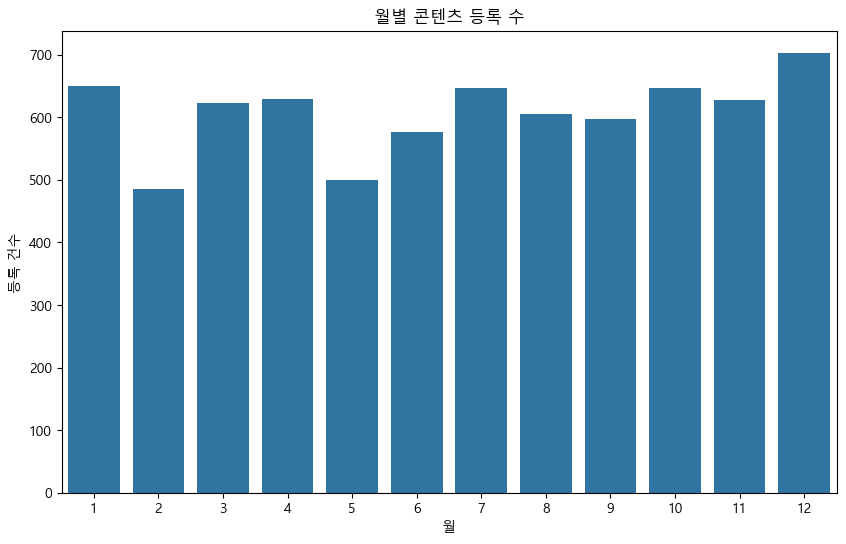

In [113]:
plt.figure(figsize=(10,6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('월별 콘텐츠 등록 수')
plt.xlabel('월')
plt.ylabel('등록 건수')
plt.show()

Merge, Concat

In [114]:
df_movie = df_work[df_work['type'] == 'Movie']
df_tv = df_work[df_work['type'] == 'TV Show']

In [115]:
merge_df = pd.merge(df_movie, df_tv, on='director', suffixes=('_movie', '_tv'))
merge_df[['director', 'title_movie', 'title_tv']].head()

,director,title_movie,title_tv
0,Tensai Okamura,Naruto the Movie: Ninja Clash in the Land of Snow,Kuromukuro
1,Kemi Adetiba,King of Boys,King of Boys: The Return of the King
2,Unknown,Kitty Love: An Homage to Cats,Blood & Water
3,Unknown,Kitty Love: An Homage to Cats,Kota Factory
4,Unknown,Kitty Love: An Homage to Cats,Dear White People


In [116]:
combined = pd.concat([df_movie, df_tv], axis=0)
combined.shape

(7290, 14)

In [117]:
combined.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_range,month
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1990,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2020,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2020,9


In [118]:
combined.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_range,month
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2010,1
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2010,9
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2010,12


Text(0.5, 1.0, '가장 많은 수의 작품을 낸 나라 top 10')

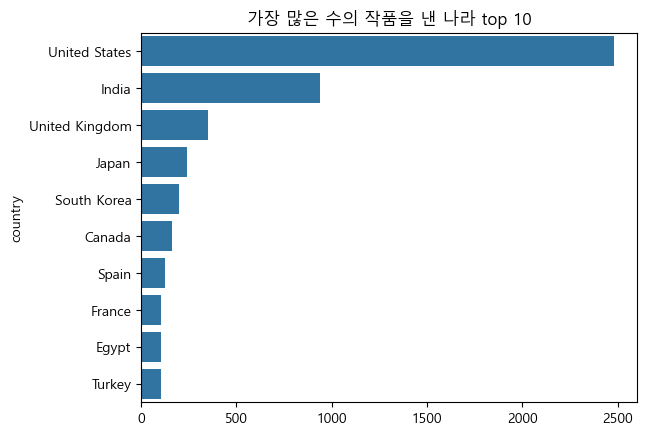

In [119]:
top_country = df_work['country'].value_counts().head(10)
sns.barplot(x=top_country.values, y=top_country.index)
plt.title('가장 많은 수의 작품을 낸 나라 top 10')

Text(0.5, 1.0, '가장 많은 수의 작품을 낸 감독 top 10')

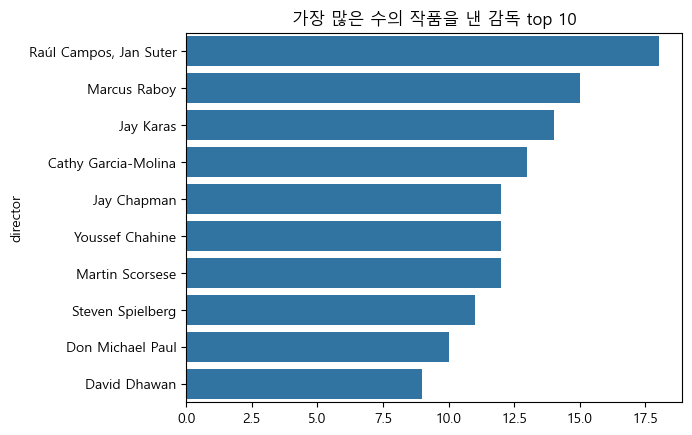

In [120]:
# 1위가 압도적 unknown이라 제외
top_director = df_work['director'].value_counts().iloc[1:11]
sns.barplot(x=top_director.values, y=top_director.index)
plt.title('가장 많은 수의 작품을 낸 감독 top 10')